# Proje: Güneş Paneli Yerleşiminde Optimum Eğim ve Yön (Genetik Algoritma)

**Adınız:** Sami Yiğit
**Soyadınız:** Uncu
**Okul Numaranız:** 2212721051
**Senaryo:** 1 (Güneş Paneli Optimizasyonu)
**GitHub Repo Bağlantısı:** https://github.com/yyigituncu/gunes-paneli-optimizasyonu

---
## 1. Proje Tanımı ve Kütüphaneler
Bu projede, bir güneş enerjisi sisteminin enerji verimini maksimize etmek amacıyla **Genetik Algoritma (GA)** kullanılacaktır. Problemin çözümünde `geneticalgorithm` kütüphanesi tercih edilmiştir.

## 2. Amaç Fonksiyonu ve Kısıtlar (Matematiksel Model)

Belediye senaryosu kapsamında optimize edilecek sistemin modeli şöyledir:

**Amaç Fonksiyonu (Enerji Verimi):**
$$y = 6x_1 + 4x_2 - 0.1x_1^2$$

Burada:
* $x_1$: Panel Eğim Açısı
* $x_2$: Panel Yön Açısı

**Kısıtlar (Constraints):**
* **Fiziksel Sınır:** $x_1 + 0.5x_2 \le 60$
* **Yön Sınırı:** $x_2 \ge 15$

**Uygulama Notu:** Genetik Algoritma kütüphanesi **minimizasyon** yaptığı için, amaç fonksiyonunun sonucu **negatif (-)** ile çarpılarak algoritmaya verilecektir. Ayrıca fiziksel sınırı aşan çözümlere **Ceza (Penalty)** puanı uygulanacaktır.

In [2]:
!pip install geneticalgorithm #Kütüphane yüklenmesi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=a5f3d4e26ed12d880d537958c3fb546b847710c1c581f325a89ed57f43f0323f
  Stored in directory: /root/.cache/pip/wheels/ed/94/4a/9ccd71f7284a92e4137b7dd0ce8540c40ea7c2689251504a49
Successfully built func-timeout


In [3]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import matplotlib.pyplot as plt

# --- AMAÇ VE CEZA FONKSİYONU ---
def fitness_function(X):
    x1 = X[0] # Eğim açısı
    x2 = X[1] # Yön açısı

    # 1. KISIT KONTROLÜ (PENALTY METHOD)
    # Eğer x1 + 0.5*x2 değeri 60'ı geçerse, algoritmaya 10000 ceza puanı ver.
    if x1 + (0.5 * x2) > 60:
        return 10000

    # 2. AMAÇ FONKSİYONU HESABI
    # y = 6x1 + 4x2 - 0.1x1^2
    y = 6*x1 + 4*x2 - 0.1*(x1**2)

    # Maksimizasyon yapmak istediğimiz için sonucu eksi ile çarpıyoruz.
    return -y

# --- DEĞİŞKEN SINIRLARI ---
# x1 (Eğim): 10 ile 45 derece arası
# x2 (Yön): 15 ile 90 derece arası (x2 >= 15 kısıtını buraya dahil ettik)
varbound = np.array([[10, 45], [15, 90]])

print("Model ve fonksiyonlar başarıyla tanımlandı.")

Model ve fonksiyonlar başarıyla tanımlandı.


## 3. Genetik Algoritma Parametreleri
Algoritmanın optimum sonuca ulaşabilmesi için aşağıdaki hiper-parametreler belirlenmiştir:
* **Popülasyon:** 50 (Çeşitlilik için ideal)
* **İterasyon:** 100 (Yakınsama için yeterli)
* **Mutasyon Oranı:** %10 (Yerel minimumdan kaçış için)
* **Çaprazlama:** %50 (Gen aktarımı için)

Genetik Algoritma çalışıyor... (Grafik aşağıda üretilecek)
 The best solution found:
 [15.31415465 89.33017663]

 Objective function:
 -425.7533011244076


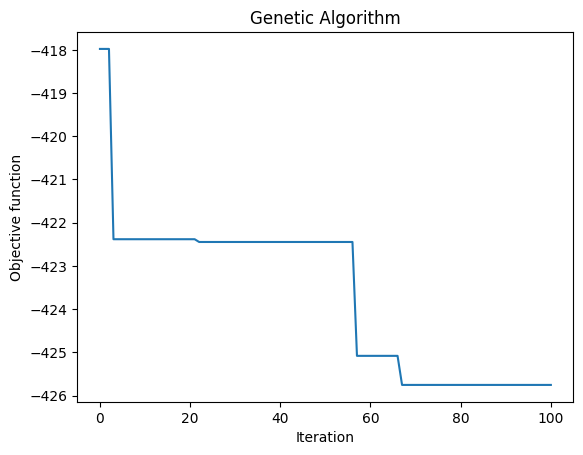


SONUÇ RAPORU
Optimum Eğim (x1) : 15.3142 derece
Optimum Yön  (x2) : 89.3302 derece
Maksimum Enerji   : 425.7533 birim
----------------------------------------
Kısıt Kontrolü (Sınır 60): 59.9792
DURUM: ✔ BAŞARILI. Kısıtlar sağlanıyor.


In [4]:
# Algoritma Parametreleri
algorithm_param = {
    'max_num_iteration': 100,
    'population_size': 50,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type':'uniform',
    'max_iteration_without_improv': None
}

# Modeli Oluştur ve Çalıştır
model = ga(function=fitness_function,
           dimension=2,
           variable_type='real',
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

print("Genetik Algoritma çalışıyor... (Grafik aşağıda üretilecek)")
model.run()

# --- SONUÇLARI DETAYLI YAZDIR ---
solution = model.output_dict
best_x1 = solution['variable'][0]
best_x2 = solution['variable'][1]
max_energy = -solution['function']

print("\n" + "="*40)
print("SONUÇ RAPORU")
print("="*40)
print(f"Optimum Eğim (x1) : {best_x1:.4f} derece")
print(f"Optimum Yön  (x2) : {best_x2:.4f} derece")
print(f"Maksimum Enerji   : {max_energy:.4f} birim")

# Kısıt Sağlaması
usage = best_x1 + 0.5 * best_x2
print("-" * 40)
print(f"Kısıt Kontrolü (Sınır 60): {usage:.4f}")
if usage <= 60.1:
    print("DURUM: ✔ BAŞARILI. Kısıtlar sağlanıyor.")
else:
    print("DURUM: ❌ BAŞARISIZ. Kısıt ihlali!")
print("="*40)